# <font color="red"> =============== ***Arabic GPT-2 For Children Story Generation***==================

Pour génerer des contes arabes pour enfants, on a proposé une solution basée sur le transfert learning en utilisant le modele GPT-2 Grace à sa puissance et son fort mecanisme de prédiction

Pour ce faire on a utilisé la bibliotheque gpt-2-simple qui permet de re-entrainer gpt-2 pour s'adapter sur notre propore corpus

# <font color="green">1. Installer le package gpt-2-simple

In [2]:
%tensorflow_version 1.15.2
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



On va utiliser GPU Nvidia T4, car il est légèrement plus rapide pour l'entraînement du GPT-2, et dispose de plus de mémoire, ce qui nous permet d'entraîner les modèles GPT-2 les plus grands et de générer plus de texte.


In [2]:
!nvidia-smi

Thu Sep 17 11:10:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#<font color="green"> 2. Téléchargement du modele 
en utilisant le medium gpt-2 (355M d'hyperparametres)

In [3]:
gpt2.download_gpt2(model_name="355M")

Fetching checkpoint: 1.05Mit [00:00, 442Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 79.4Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, 442Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 1.42Git [00:08, 165Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 271Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 84.2Mit/s]                                                
Fetching vocab.bpe: 1.05Mit [00:00, 138Mit/s]                                                       


#<font color="green"> 3. Téléchargement de données



In [4]:
from google.colab import files
files.upload()

Saving histoire_arabe.txt to histoire_arabe.txt


{'histoire_arabe.txt': b'\xd8\xa7\xd9\x84\xd9\x82\xd8\xb7\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xad\xd8\xa7\xd8\xa6\xd8\xb1\xd8\xa9 \xd9\x81\xd9\x8a \xd8\xa3\xd8\xad\xd8\xaf \xd8\xa7\xd9\x84\xd8\xa3\xd9\x8a\xd8\xa7\xd9\x85 \xd9\x83\xd8\xa7\xd9\x86\xd8\xaa \xd9\x87\xd9\x86\xd8\xa7\xd9\x83 \xd9\x82\xd8\xb7\xd8\xa9\xd9\x8c \xd9\x84\xd8\xb7\xd9\x8a\xd9\x81\xd8\xa9\xd9\x8c \xd9\x88\xd8\xac\xd9\x85\xd9\x8a\xd9\x84\xd8\xa9 \xd8\xaa\xd8\xaf\xd8\xb9\xd9\x89 \xd9\x82\xd8\xb7\xd9\x82\xd9\x88\xd8\xb7\xd8\xa9\xd8\x8c \xd8\xa5\xd9\x84\xd9\x91\xd8\xa7 \xd8\xa3\xd9\x86\xd9\x91\xd9\x87\xd8\xa7 \xd9\x83\xd8\xa7\xd9\x86\xd8\xaa \xd9\x84\xd8\xa7 \xd8\xaa\xd8\xad\xd8\xa8\xd9\x91 \xd8\xb4\xd9\x83\xd9\x84\xd9\x87\xd8\xa7\xd8\x8c \xd9\x81\xd9\x83\xd8\xa7\xd9\x86\xd8\xaa \xd8\xaa\xd8\xaa\xd8\xb0\xd9\x85\xd9\x91\xd8\xb1 \xd9\x81\xd9\x8a \xd9\x83\xd9\x84\xd9\x90\xd9\x91 \xd9\x85\xd8\xb1\xd9\x91\xd8\xa9\xd9\x8d \xd9\x81\xd9\x8a \xd8\xaa\xd9\x86\xd8\xb8\xd8\xb1 \xd9\x81\xd9\x8a\xd9\x87\xd8\xa7 \xd8\xa5\xd9\x84\xd9\x89 \xd8

In [5]:
file_name = "histoire_arabe.txt"

# <font color="green"> 4. Création du modele
Entrainer le modele sur le corpus arabe, le nombre des epocs est 5000

In [6]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='355M',
              steps=5000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use tensorflow.python.ops.op_selector.get_backward_walk_ops.
Loading checkpoint models/355M/model.ckpt
INFO:tensorflow:Restoring parameters from models/355M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


dataset has 52582 tokens
Training...
[10 | 18.59] loss=2.12 avg=2.12
[20 | 27.48] loss=2.03 avg=2.08
[30 | 36.35] loss=1.88 avg=2.01
[40 | 45.26] loss=1.94 avg=1.99
[50 | 54.13] loss=1.76 avg=1.95
[60 | 63.00] loss=1.81 avg=1.92
[70 | 71.88] loss=1.83 avg=1.91
[80 | 80.74] loss=1.59 avg=1.87
[90 | 89.63] loss=1.55 avg=1.83
[100 | 98.51] loss=1.20 avg=1.77
[110 | 107.39] loss=1.66 avg=1.76
[120 | 116.27] loss=1.69 avg=1.75
[130 | 125.15] loss=1.30 avg=1.71
[140 | 134.05] loss=1.88 avg=1.73
[150 | 142.91] loss=1.61 avg=1.72
[160 | 151.83] loss=1.06 avg=1.67
[170 | 160.72] loss=1.34 avg=1.65
[180 | 169.59] loss=1.08 avg=1.62
[190 | 178.45] loss=0.94 avg=1.58
[200 | 187.34] loss=0.87 avg=1.54
======== SAMPLE 1 ========
ه والحير التحرق هو وشكر منه ، فرأت ملك الأيام يفعض جسمه الحيوانات فصار الكثير خلف الأرنب لاحظ يبذله كعيد، وماذا تيتما على الأرنب في الغابة بشيها وسع علين كوك؛ يخرج مع البغبغاء، وعند وحقله بحبطة العقل بأقبعة الغفات منها، وأن تعتقد إلى الأرنب يجعلن تروده، ثم حبطة العقل ولكنه ل

# <font color="green">5. Evaluation

En tracant l'erreur en fonction de nombre des epoches

Loss function egale à 2%
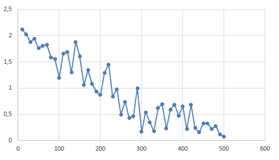

In [7]:
gpt2.reset_session(sess)
del sess
sess = gpt2.start_tf_sess()

In [8]:
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint checkpoint/run1/model-5000
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-5000


# <font Color="green">6. Génération 

In [9]:
gpt2.generate(sess, run_name='run1')

هرب الأوز بفخر وقال له : كيف حالك يا ملك هذا البستان، لقد كنت قبل قليل مع اخوتك الثيران وقد تكلموا عنك كلاماً سيئاً وانا لا اريد ان انقل لك الكلام الذي قبل حتي لا تتشاجر معهم وانا لك ناصح أمين، اغتاظ الثور من كلام الاسد وقال : ماذا قال اسد في بوماً، فأنه قال الاسد : ستري ما سأفعله به، ثم التفت الي النجار وقال له : هل تاكلم سيأتميز ، ولكنهم لا يجب الصّغير ، ويدور في الشوارع ، وفي يوم من الأيام ، وقال بفخر : والذي بفخر ،  واكله : نعم إن لدي سمك لك بعيد اقترابه ولا يجب الصّغير ، ويخبر ألى الأرنب وحاولت أنّهم كانوا قد جهزوا قفص وقد جههوا في إثبات عكس كلامه وأنّه كلام الاسد به ، في إثبات جمّه نظر في أحد الجبال يحذر بوجبه ، ويخبر ألى الأرنب وحاولت أنّه كان يشاركه ، ويوماً ما سيعرف أصبحت تكرههه ويوماً ، فلكل مرّ كلامه ويأكله من دون أسئلة في قدم دون أحد الجبال.

رجع صدق السوء

كان يا ما كان هناك نهر يتكلم  وكان هذا الإستهزاء والسير والفاصل في المنزل وذهب هو سيأتكمل الحيوانات للأنّهم كان يحب أن يتكلم مع الأطفال كثيراً وبيع الرجل والخراف الصغيرة هناك ثقبت عليه ينهق وحيها اليوم !

تحركت البعوضة و

In [10]:
gpt2.generate(sess,
              length=1000,
              temperature=0.7,
              top_k=50,
              prefix="في احد الايام")

��ي احد الايام جميعًا، ويجعلهم يخشون الاقتراب منا؟ فإنت عندما تشعر بالخطر يهددك تستطيع إطلاق الشوك على أعدائك، فتحمي نفسك وأصدقاءك وعائلتك، فاحمد الله على نعمه ياكون خوفه، ففرحت جميعًا أ�لى إنقاذ رآه، فقالت: سأتناول الجديد مسرعوراً: "أنا إنسان فقير يامولاي!"صعوف تمتلك! أنت حمل إنقاذك إلى أقناذ في أمر الجميع، وأنا متأكدة إلى أقناذه في أمر الجميع، وسأله: "لماذا أنت هنا على الأرض أبداً، لكنه أيها العصفور الصغير الجميل؟ فأنت تعذب الحكمة أعودة إلى المنزل"، كانت هناك تقضي على إهار به على خروفة الشريرة. حجم الملك إلى منزله وإخوته في مياه البط ما فعلته ووصلت رائحة الفاكهة الفراشة حتى تهرب وأخربه بما أنعم الله عليه به بسبب أن جعله سبباً في شفاء ذلك الملك المريض.

وأثناء رحلته بالصغيرة والاطقاله سعيدة كل من يخرجون مع صاحبه ، وفي شفاء ذلك الملك المريض.

وماذا يحكم ويحكما صاحبه ، بائع الخضار كل صباح يجر عربه الخضار ، ليبيع الرجل الخضروات الطازجة في الوقت الشتاء الذي تكون في تدعى إلى الملك وإعطائه حول الشجرة المريضة ، وكانوا جميعًا قوي تمرف بعيدة ، وأنه يتو
